<a href="https://colab.research.google.com/github/Manwa94/Machine_Learning/blob/main/Instagram_Reach_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load Data
data=pd.read_csv("Instagram data.csv", encoding='latin1')
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [ ]:
# Check for null values
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [ ]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


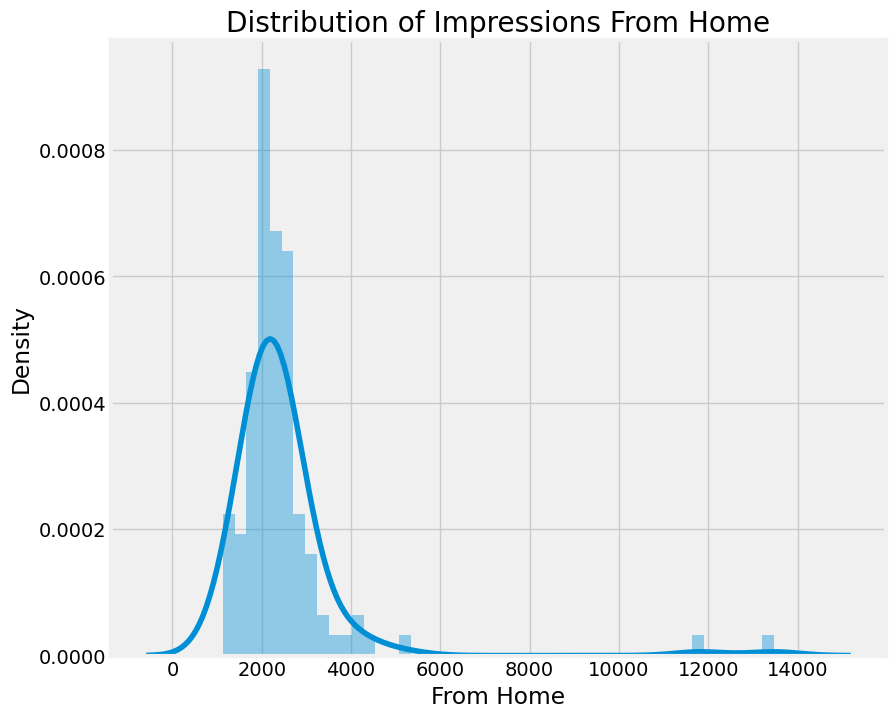

In [ ]:
# Distribution of Impressions From Home
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

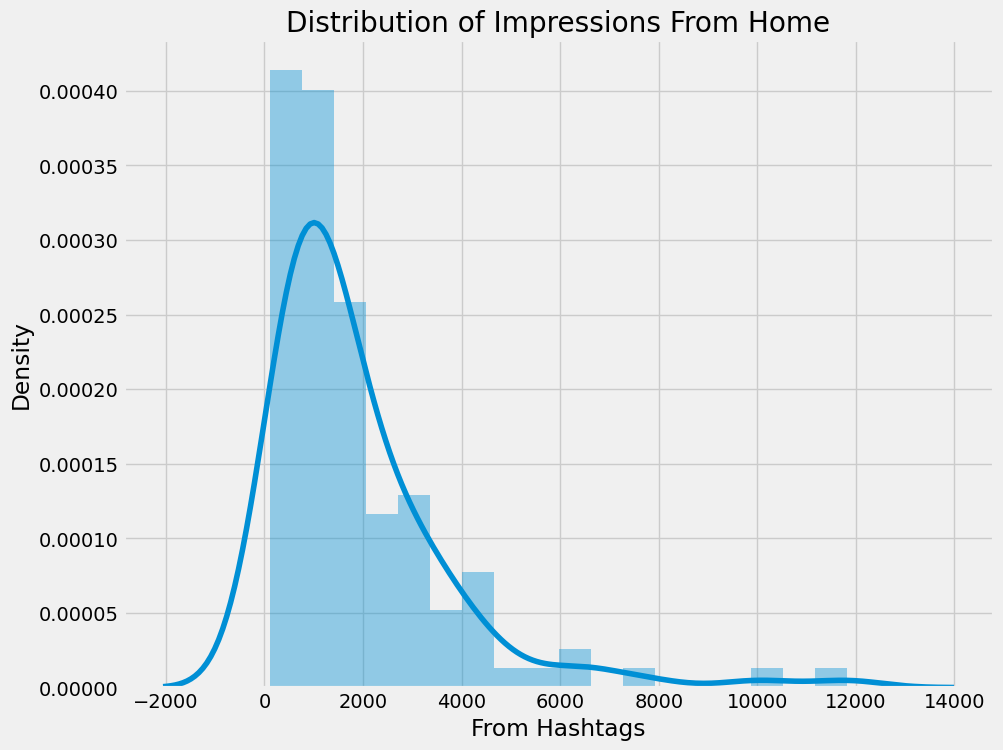

In [ ]:
# Distribution of Impressions From Hashtags
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Hashtags'])
plt.show()

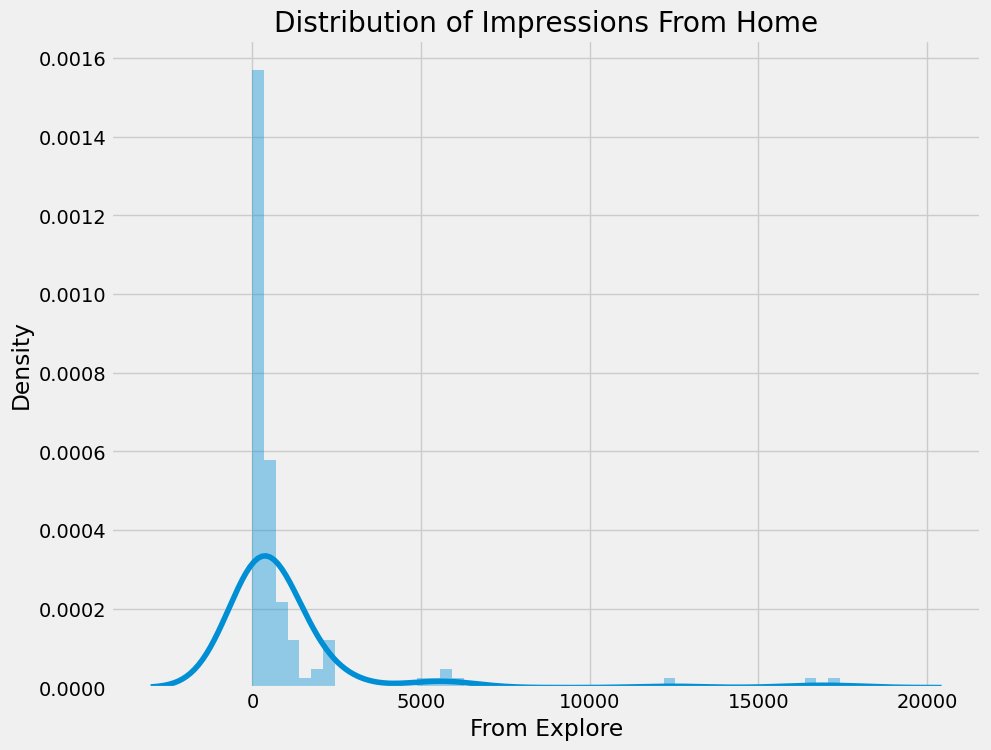

In [ ]:
# Distribution of Impressions From Explore
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Explore'])
plt.show()

In [ ]:
# Pie chart of Impressions Sources
home=data["From Home"].sum()
hashtag=data["From Hashtags"].sum()
explore=data["From Explore"].sum()
other=data["From Other"].sum()

labels=['Home','Hashtag','Explore','Other']
values=[home,hashtag,explore,other]

fig=px.pie(data,values=values,names=labels,hole=0.5,title='Impression on Instagram Post from various sources')
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

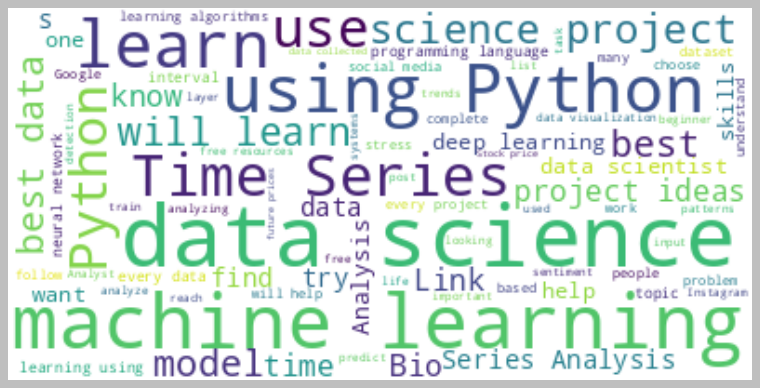

In [ ]:
# Word Cloud for Captions
text=" ".join(i for i in data.Caption)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show

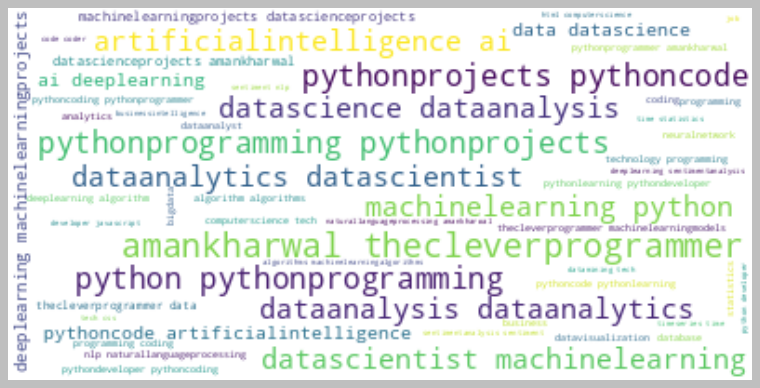

In [ ]:
# Word Cloud for Hashtags
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Scatter plots with Trendlines
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [ ]:

figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols",
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [ ]:

figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols",
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [ ]:

figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols",
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [ ]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [ ]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols",
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [ ]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.4,
                                                random_state=42)

In [ ]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8736172545589492

In [ ]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10830.22857705])